<a href="https://colab.research.google.com/github/NataliaGon/kpi/blob/AI-cybersecurity/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import os
import pandas as pd
import numpy as np
import kagglehub
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA


In [53]:
path = kagglehub.dataset_download("whenamancodes/infoseccyber-security-salaries")

print("Path to dataset files:", path)
print("Files in dataset folder:", os.listdir(path))

Using Colab cache for faster access to the 'infoseccyber-security-salaries' dataset.
Path to dataset files: /kaggle/input/infoseccyber-security-salaries
Files in dataset folder: ['Cyber_salaries.csv']


In [54]:
df = pd.read_csv(os.path.join(path, "Cyber_salaries.csv"))

print("Size rows/columns:", df.shape)

print(df.isnull().sum())

df.describe()

Size rows/columns: (1349, 11)
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


,work_year,salary,salary_in_usd,remote_ratio
count,1349.000000,1.349000e+03,1349.000000,1349.000000
mean,2021.368421,5.288248e+05,121578.622683,72.238695
std,0.711236,1.361367e+07,68972.954838,39.355331
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,8.000000e+04,75000.000000,50.000000
50%,2022.000000,1.200000e+05,115000.000000,100.000000
75%,2022.000000,1.600800e+05,152000.000000,100.000000
max,2022.000000,5.000000e+08,899920.000000,100.000000


In [58]:
df_encoded = pd.get_dummies(df)

print("Test size:", X.describe())

Test size:          work_year  salary_in_usd  remote_ratio
count  1349.000000    1349.000000   1349.000000
mean   2021.368421  121578.622683     72.238695
std       0.711236   68972.954838     39.355331
min    2020.000000    2000.000000      0.000000
25%    2021.000000   75000.000000     50.000000
50%    2022.000000  115000.000000    100.000000
75%    2022.000000  152000.000000    100.000000
max    2022.000000  899920.000000    100.000000


# Elbow method

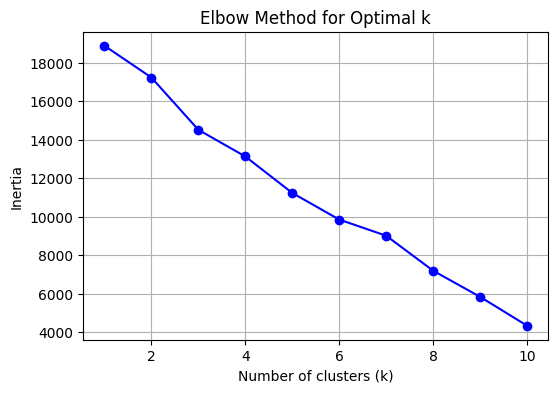

In [59]:
df = df[['work_year', 'experience_level', 'employment_type',
         'salary_in_usd', 'remote_ratio', 'company_size']]

X = pd.get_dummies(df)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# we use your scaled data from before
inertias = []
K = range(1, 11)  # test k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # store inertia for each k

# plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'bo-', markersize=6)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# KMeans

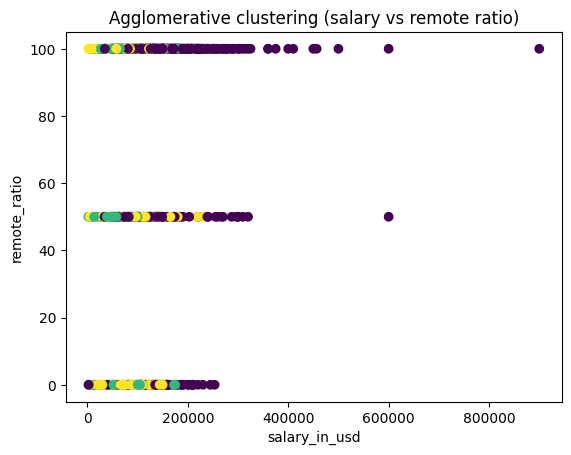

In [60]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

x_col = "salary_in_usd"
y_col = "remote_ratio"

plt.scatter(df[x_col], df[y_col], c=model.labels_, cmap="viridis")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("Agglomerative clustering (salary vs remote ratio)")
plt.show()



# AgglomerativeClustering

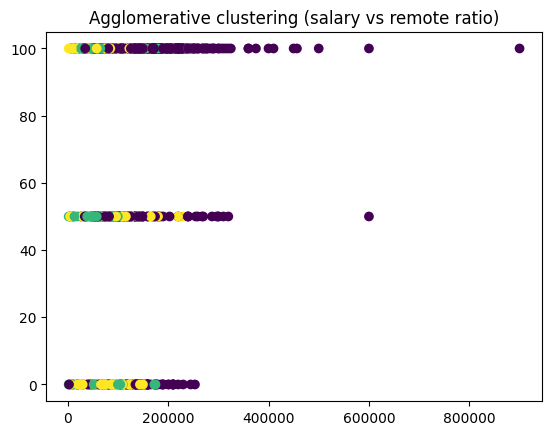

In [61]:
model = AgglomerativeClustering(n_clusters=4)
model.fit(X_scaled)

x_col = "salary_in_usd"
y_col = "remote_ratio"

# Візуалізуємо результати
plt.scatter(df[x_col], df[y_col], c=model.labels_, cmap='viridis')
plt.title("Agglomerative clustering (salary vs remote ratio)")
plt.show()

In [62]:
print(np.bincount(model.labels_))
print(np.bincount(kmeans.labels_))

[662  23 258 406]
[653  92 417 187]


# Висновки

Алгоритм K-Means сформував більш рівномірні кластери, тоді як ієрархічна кластеризація виділила один малий кластер, що містить ймовірні аномальні значення.

Візуалізація за ознаками salary_in_usd та remote_ratio засвідчила схожість результатів обох методів, що пояснюється низькою кількістю унікальних значень для remote_ratio і високою варіативністю заробітної плати.
